# Code used to create Figure 6

In [2]:
library(data.table)
library(ggplot2)
library(RColorBrewer)
library(ggsci)
library(magrittr) 
library(plyr)

## Best settings for each of six PRS conditions

In [17]:
#load data
load("../data/PRS_allres_Mar2021.RData")
head(out,n=2)

id,gwasdata,type,pth,r2,Pop
ACR_REF,EUR,impact,1e-01,0.09849492,EUR
ACR_REF,EUR,impact,3e-02,0.08126775,EUR


In [18]:
#identify best p value for each condition
res <- data.frame()

gwas="Trans"
type="impact"
d1 <- subset(out,gwasdata=="Trans" & type=="impact")
d1 <- d1[,c("pth","r2")]
d1 <- ddply(d1, c("pth"), colwise(mean))
d1 <- d1[order(-d1$r2),]
bestp <- as.character(d1[1,"pth"])
dump <- data.frame(gwas,type,bestp)
res <- rbind(res,dump)

gwas="Trans"
type="noimpact"
d1 <- subset(out,gwasdata=="Trans" & type=="noimpact")
d1 <- d1[,c("pth","r2")]
d1 <- ddply(d1, c("pth"), colwise(mean))
d1 <- d1[order(-d1$r2),]
bestp <- as.character(d1[1,"pth"])
dump <- data.frame(gwas,type,bestp)
res <- rbind(res,dump)

gwas="EUR"
type="impact"
d1 <- subset(out,gwasdata=="EUR" & type=="impact")
d1 <- d1[,c("pth","r2")]
d1 <- ddply(d1, c("pth"), colwise(mean))
d1 <- d1[order(-d1$r2),]
bestp <- as.character(d1[1,"pth"])
dump <- data.frame(gwas,type,bestp)
res <- rbind(res,dump)

gwas="EUR"
type="noimpact"
d1 <- subset(out,gwasdata=="EUR" & type=="noimpact")
d1 <- d1[,c("pth","r2")]
d1 <- ddply(d1, c("pth"), colwise(mean))
d1 <- d1[order(-d1$r2),]
bestp <- as.character(d1[1,"pth"])
dump <- data.frame(gwas,type,bestp)
res <- rbind(res,dump)

gwas="EAS"
type="impact"
d1 <- subset(out,gwasdata=="EAS" & type=="impact")
d1 <- d1[,c("pth","r2")]
d1 <- ddply(d1, c("pth"), colwise(mean))
d1 <- d1[order(-d1$r2),]
bestp <- as.character(d1[1,"pth"])
dump <- data.frame(gwas,type,bestp)
res <- rbind(res,dump)

gwas="EAS"
type="noimpact"
d1 <- subset(out,gwasdata=="EAS" & type=="noimpact")
d1 <- d1[,c("pth","r2")]
d1 <- ddply(d1, c("pth"), colwise(mean))
d1 <- d1[order(-d1$r2),]
bestp <- as.character(d1[1,"pth"])
dump <- data.frame(gwas,type,bestp)
res <- rbind(res,dump)

bestpcond <- res
bestpcond

gwas,type,bestp
Trans,impact,3e-03
Trans,noimpact,1e-03
EUR,impact,3e-03
EUR,noimpact,1e-01
EAS,impact,3e-03
EAS,noimpact,1e-04


## Improvement ratio (Figure 6b)

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] 111


 Same  Diff Trans 
   33    41    37 

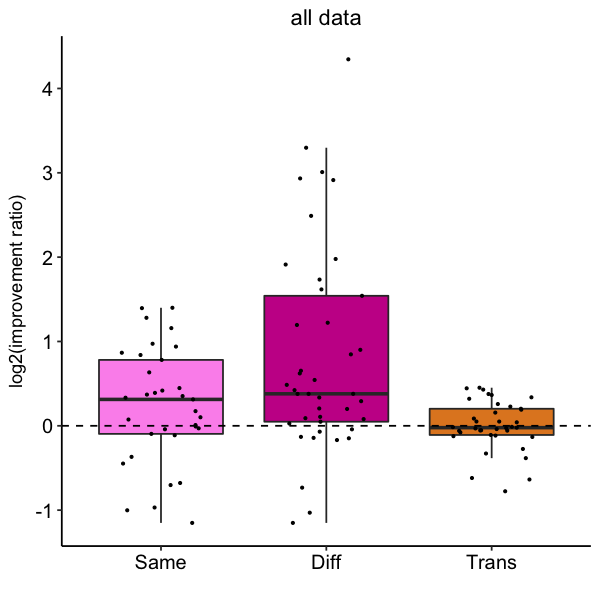

In [19]:
load("../data/PRS_allres_Mar2021.RData")
 #head(out,n=2)

res <- data.frame()

#EAS to EAS (same-ancestry)
df <- subset(out,gwasdata=="EAS" & Pop=="EAS")
df2 <- data.frame()
for(x in c("Trans","EUR","EAS")){
for(y in c("impact","noimpact")){
    bestp <- as.character(subset(bestpcond, gwas==x & type==y)$bestp)
    z <- subset(df,gwasdata==x  & type==y & pth==bestp)
    df2 <- rbind(df2,z)
}  
}
df2 <- df2[order(df2$id),]
d1 <- subset(df2,type=="impact")
d2 <- subset(df2,type=="noimpact")
identical(d1$id,d2$id)
dump <- data.frame(data="Same",rate=d1$r2/d2$r2,id=d2$id)
res <- rbind(res,dump)

#EUR to EUR (same-ancestry)
df <- subset(out,gwasdata=="EUR" & Pop=="EUR")
df2 <- data.frame()
for(x in c("Trans","EUR","EAS")){
for(y in c("impact","noimpact")){
    bestp <- as.character(subset(bestpcond, gwas==x & type==y)$bestp)
    z <- subset(df,gwasdata==x  & type==y & pth==bestp)
    df2 <- rbind(df2,z)
}  
}
df2 <- df2[order(df2$id),]
d1 <- subset(df2,type=="impact")
d2 <- subset(df2,type=="noimpact")
identical(d1$id,d2$id)
dump <- data.frame(data="Same",rate=d1$r2/d2$r2,id=d2$id)
res <- rbind(res,dump)

#EAS to Others (diff-ancestry)
df <- subset(out,gwasdata=="EAS" & Pop!="EAS")
df2 <- data.frame()
for(x in c("Trans","EUR","EAS")){
for(y in c("impact","noimpact")){
    bestp <- as.character(subset(bestpcond, gwas==x & type==y)$bestp)
    z <- subset(df,gwasdata==x  & type==y & pth==bestp)
    df2 <- rbind(df2,z)
}  
}
df2 <- df2[order(df2$id),]
d1 <- subset(df2,type=="impact")
d2 <- subset(df2,type=="noimpact")
identical(d1$id,d2$id)
dump <- data.frame(data="Diff",rate=d1$r2/d2$r2,id=d2$id)
res <- rbind(res,dump)

#EUR to Others (diff-ancestry)
df <- subset(out,gwasdata=="EUR" & Pop!="EUR")
df2 <- data.frame()
for(x in c("Trans","EUR","EAS")){
for(y in c("impact","noimpact")){
    bestp <- as.character(subset(bestpcond, gwas==x & type==y)$bestp)
    z <- subset(df,gwasdata==x  & type==y & pth==bestp)
    df2 <- rbind(df2,z)
}  
}
df2 <- df2[order(df2$id),]
d1 <- subset(df2,type=="impact")
d2 <- subset(df2,type=="noimpact")
identical(d1$id,d2$id)
dump <- data.frame(data="Diff",rate=d1$r2/d2$r2,id=d2$id)
res <- rbind(res,dump)

#Trans (all)
df <- subset(out, gwasdata=="Trans")
df2 <- data.frame()
for(x in c("Trans","EUR","EAS")){
for(y in c("impact","noimpact")){
    bestp <- as.character(subset(bestpcond, gwas==x & type==y)$bestp)
    z <- subset(df,gwasdata==x  & type==y & pth==bestp)
    df2 <- rbind(df2,z)
}  
}
df2 <- df2[order(df2$id),]
d1 <- subset(df2,type=="impact")
d2 <- subset(df2,type=="noimpact")
identical(d1$id,d2$id)
dump <- data.frame(data="Trans",rate=d1$r2/d2$r2,id=d2$id)
res <- rbind(res,dump)

df <- res
nrow(df)
table(df$data)

df$data <- factor(df$data,levels=c("Same","Diff","Trans"))

options(repr.plot.width=5, repr.plot.height=5)

df  %>% ggplot(aes( x = data, y= log2(rate), fill=data )) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width=0.25,size=0.5) +
    #geom_line() +
  theme_bw() +
  #scale_y_continuous(limits=c(0, NA)) +
  geom_hline(yintercept = 0, linetype="dashed") +
  #scale_fill_jama(name="") +
  scale_fill_manual(values=c("#FC95EDFF","#C80B96FF",pal_nejm()(3)[3])) +
  labs(x="", y="log2(improvement ratio)", title="all data") +
  theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
  theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme( panel.border = element_blank(), panel.background = element_blank() ) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme( axis.text.x=element_text(colour="black",size=12)) +
  theme( axis.text.y=element_text(colour="black",size=12)) +
  theme(legend.position = "none") 

In [20]:
#sign test
x <- subset(df,data=="Same")$rate
summary(x)
length(x[x>=1])
length(x)
binom.test(x=length(x[x>=1]),n=length(x),p=0.5,alternative = "greater")$p.value

x <- subset(df,data=="Diff")$rate
summary(x)
length(x[x>=1])
length(x)
binom.test(x=length(x[x>=1]),n=length(x),p=0.5,alternative = "greater")$p.value

x <- subset(df,data=="Trans")$rate
summary(x)
length(x[x>=1])
length(x)
binom.test(x=length(x[x>=1]),n=length(x),p=0.5,alternative = "greater")$p.value

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4502  0.9359  1.2423  1.3046  1.7189  2.6383 

[1] 21

[1] 33

[1] 0.08137783

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4502  1.0343  1.3007  2.7470  2.9113 20.3323 

[1] 32

[1] 41

[1] 0.0002154285

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5838  0.9275  0.9849  1.0204  1.1505  1.3676 

[1] 16

[1] 37

[1] 0.8379957

## PRS performances (Figure 6c)

In [23]:
#load data
load("../data/PRS_allres_Mar2021.RData")
head(out,n=2)

id,gwasdata,type,pth,r2,Pop
ACR_REF,EUR,impact,1e-01,0.09849492,EUR
ACR_REF,EUR,impact,3e-02,0.08126775,EUR


In [24]:
color <- c('#E18727FF','#E64B35FF','#4DBBD5FF')

[1] 111


Trans   EUR   EAS 
   37    37    37 

[1] 2.910383e-11

[1] 1.653825e-07

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.008037 0.032814 0.056122 0.054335 0.068083 0.122531 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.003817 0.016388 0.042566 0.040589 0.059040 0.085577 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001229 0.007787 0.021947 0.021660 0.027636 0.062430 

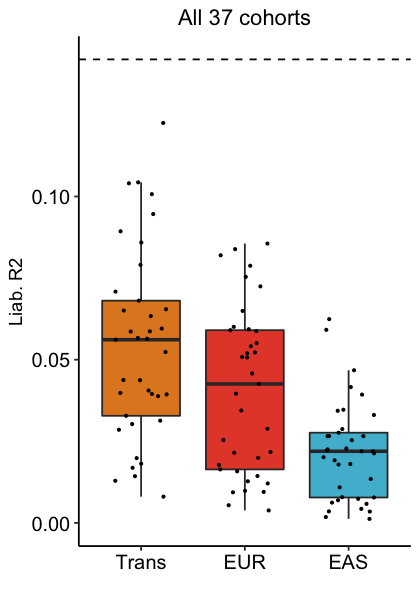

In [26]:
#plot all population
d1 <- subset(out,type=="impact")
df <- d1

#use best p value for each prs condition
df2 <- data.frame()
for(x in c("Trans","EUR","EAS")){
for(y in c("impact","noimpact")){
    bestp <- as.character(subset(bestpcond, gwas==x & type==y)$bestp)
    z <- subset(df, gwasdata==x  & type==y & pth==bestp)
    df2 <- rbind(df2,z)
}  
}

df2$gwasdata <- factor(df2$gwasdata,levels=c("Trans","EUR","EAS"))
nrow(df2)
table(df2$gwasdata)

options(repr.plot.width=3.5, repr.plot.height=5)

Max=0.142 #LDSC h2 of EUR

df2  %>% ggplot(aes( x = gwasdata, y= r2, fill=gwasdata )) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width=0.25,size=0.5) +
    #geom_line() +
  theme_bw() +
  scale_y_continuous(limits=c(0,Max)) +
  geom_hline(yintercept = Max, linetype="dashed") +
  scale_fill_manual(name="",values=color) +
  labs(x="", y="Liab. R2", title="All 37 cohorts") +
  theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
  theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme( panel.border = element_blank(), panel.background = element_blank() ) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme( axis.text.x=element_text(colour="black",size=12)) +
  theme( axis.text.y=element_text(colour="black",size=12)) +
  theme(legend.position = "none") 

df2 <- df2[order(df2$id,df2$gwasdata),]


  #wilcox.test(
  #     subset(df2,gwasdata=="EAS")$r2,
  #     subset(df2,gwasdata=="EUR")$r2,paired = T)$p.value

#EAS vs Trans
wilcox.test(
       subset(df2,gwasdata=="EAS")$r2,
       subset(df2,gwasdata=="Trans")$r2,paired = T)$p.value

#EUR vs Trans
wilcox.test(
       subset(df2,gwasdata=="EUR")$r2,
       subset(df2,gwasdata=="Trans")$r2,paired = T)$p.value

subset(df2,gwasdata=="Trans")$r2 %>% summary()
subset(df2,gwasdata=="EUR")$r2 %>% summary()
subset(df2,gwasdata=="EAS")$r2 %>% summary()

[1] 0.6652995

[1] 0.002273588

[1] 37

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01290 0.04054 0.05862 0.05941 0.07905 0.10434 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02854 0.03746 0.04609 0.05663 0.06878 0.12253 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.008037 0.012736 0.015593 0.018009 0.020866 0.032814 

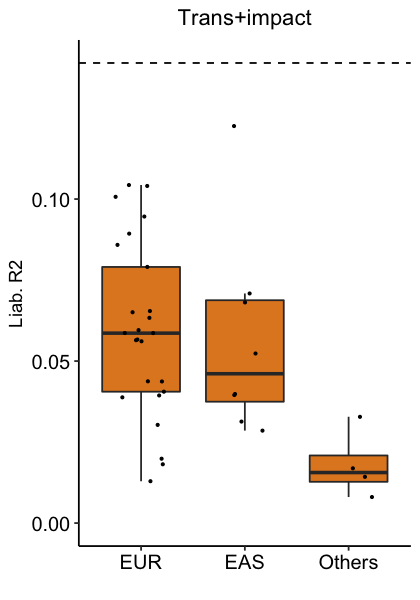

In [27]:
#Plot all with Trans + impact
d1 <- subset(out,type=="impact" & gwasdata=="Trans")
df <- subset(d1,pth=="3e-03") #use best p value for this prs condition

df$Pop2 <- sapply(df$Pop,function(x){
    if(x=="EUR"|x=="EAS"){x=x}else{x="Others"}
    return(x)
})
df$Pop2 <- factor(df$Pop2,levels=c("EUR","EAS","Others"))

options(repr.plot.width=3.5, repr.plot.height=5)

Max=0.142 #LDSC h2 of EUR

df  %>% ggplot(aes( x = Pop2, y= r2)) + #fill=Pop2 
  geom_boxplot(outlier.shape = NA, fill=color[1]) +
  geom_jitter(width=0.25,size=0.5) +
    #geom_line() +
  theme_bw() +
  scale_y_continuous(limits=c(0,Max)) +
  geom_hline(yintercept = Max, linetype="dashed") +
  #scale_fill_npg(name="") +
  labs(x="", y="Liab. R2", title="Trans+impact") +
  theme( axis.line = element_line(colour = "black"), axis.text=element_text(colour="black") ) +
  theme( panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme( panel.border = element_blank(), panel.background = element_blank() ) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme( axis.text.x=element_text(colour="black",size=12)) +
  theme( axis.text.y=element_text(colour="black",size=12)) +
  theme(legend.position = "none") 


df <- df[order(df$id,df$gwasdata),]

#EAS vs EUR
wilcox.test(
       subset(df,Pop2=="EAS")$r2,
       subset(df,Pop2=="EUR")$r2)$p.value

#Others vs EUR
wilcox.test(
       subset(df,Pop2=="Others")$r2,
       subset(df,Pop2=="EUR")$r2)$p.value

nrow(df)

subset(df,Pop2=="EUR")$r2 %>% summary()
subset(df,Pop2=="EAS")$r2 %>% summary()
subset(df,Pop2=="Others")$r2 %>% summary()